# Pandas

pandas extends the numpy ndarray to allow for a data-structure that labels the columns (called a data frame).  You can kind of think about this functionality as operating how a spreadsheet might work.

In this manner, it provides much of the same functionality of R -- the data frame provides the basis for data analysis.

Nice documentation is here:

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## series

A series is a labeled array.  It looks superficially like a dictionary, but is fixed size, and can handle missing values.  It also can also be operated on with any numpy operation or the standard operators (a dictionary cannot).  The labels are referred to as the _index_.

Some examples from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.462095
b    0.320360
c    0.797450
d   -0.355669
e    0.526127
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

If you don't specify an index, one will be made up for you

In [4]:
pd.Series(np.random.randn(5))


0   -2.604762
1   -1.199975
2    0.128513
3   -0.290542
4   -1.511929
dtype: float64

you can initialize from a dictionary.  By default it will use the dictionary keys (sorted) as the index

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
newdict = pd.Series(d)
print(type(d))
print(type(newdict))
print(newdict)
d = {'a' : 0., 'c' : 1., 'b' : 2.}
newdict = pd.Series(d)
print(newdict)

<class 'dict'>
<class 'pandas.core.series.Series'>
a    0.0
b    1.0
c    2.0
dtype: float64
a    0.0
c    1.0
b    2.0
dtype: float64


In [6]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    2.0
c    1.0
d    NaN
a    0.0
dtype: float64

Note that NaN indicates a missing value

you can operate on a series as you would any ndarray

In [7]:
s

a    1.462095
b    0.320360
c    0.797450
d   -0.355669
e    0.526127
dtype: float64

In [8]:
s[0]

1.4620949905249685

In [9]:
s[:3]

a    1.462095
b    0.320360
c    0.797450
dtype: float64

In [10]:
s[s > s.median()]

a    1.462095
c    0.797450
dtype: float64

In [11]:
np.exp(s)

a    4.314990
b    1.377624
c    2.219874
d    0.700704
e    1.692365
dtype: float64

you can also index by label -- this mimics the behavior of a dictionary

In [12]:
s['a']

1.4620949905249685

In [13]:
s['e']

0.5261271791791539

In [14]:
'e' in s

True

The `get()` method can be used to safely access an element if it is possible it does not exist -- you can specify a default to return in that case.  The alternative is to use a `try` / `except` block.

In [15]:
s.get('f', np.nan)


nan

Operations, like those you use with an ndarray work fine on a Series

In [16]:
s + s

a    2.924190
b    0.640720
c    1.594901
d   -0.711339
e    1.052254
dtype: float64

In [17]:
s * 2

a    2.924190
b    0.640720
c    1.594901
d   -0.711339
e    1.052254
dtype: float64

note that operations are always done on like labels, so the following is not exactly the same as numpy arrays.  In this sense, pandas results respect the union of indices 

In [18]:
print(s[1:] + s[:-1])
print(s[1:])
print(s[:-1])


a         NaN
b    0.640720
c    1.594901
d   -0.711339
e         NaN
dtype: float64
b    0.320360
c    0.797450
d   -0.355669
e    0.526127
dtype: float64
a    1.462095
b    0.320360
c    0.797450
d   -0.355669
dtype: float64


a series can have a name

In [19]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.207113
1   -1.465487
2    1.127650
3   -0.627028
4   -1.271761
Name: something, dtype: float64

## DataFrame

The dataframe is like a spreadsheet -- the columns and rows have labels.  It is 2-d.  This is what you will usually use with pandas.

you can initialize from:
  * Dict of 1D ndarrays, lists, dicts, or Series
  * 2-D numpy.ndarray
  * Structured or record ndarray
  * A Series
  * Another DataFrame

In [20]:
d = {'one' : pd.Series([1., 2., 3.], index=['b', 'a', 'c']),
     'two' : pd.Series([2, 1., 3., 4.], index=['b', 'a', 'c', 'd'])}
type(d)

dict

In [21]:
df = pd.DataFrame(d)
type(df)

pandas.core.frame.DataFrame

In [22]:
df.mean()

one    2.0
two    2.5
dtype: float64

You can exclude some labels

In [23]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,1.0,2.0
a,2.0,1.0


Here's initialization from lists / ndarrays

In [24]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

In [25]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [26]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


there are lots of other initialization methods, e.g, list of dicts

In [27]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


### working with the dataframe

you can index it as it it were Series objects.  Other access is as follows:

  * Select column: `df[col]` (returns Series)
  * Select row by label: `df.loc[label]` (returns Series)
  * Select row by integer location: `df.iloc[loc]` (returns Series)
  * Slice rows: `df[5:10]` (returns DataFrame)
  * Select rows by boolean vector: `df[bool_vec]` (return DataFrame)

In [28]:
df['one']

a    2.0
b    1.0
c    3.0
d    NaN
Name: one, dtype: float64

In [29]:
df

,one,two
a,2.0,1.0
b,1.0,2.0
c,3.0,3.0
d,NaN,4.0


In [30]:
type(df['one'])

pandas.core.series.Series

In [31]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,2.0,1.0,2.0,False
b,1.0,2.0,2.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


you can also treat any index name as if it were a property

In [32]:
df.three

a    2.0
b    2.0
c    9.0
d    NaN
Name: three, dtype: float64

you can delete or pop columns---popping returns a `Series`

In [33]:
del df['two']

In [34]:
three = df.pop('three')

In [35]:
df

,one,flag
a,2.0,False
b,1.0,False
c,3.0,True
d,NaN,False


In [36]:
three

a    2.0
b    2.0
c    9.0
d    NaN
Name: three, dtype: float64

In [37]:
type(three)

pandas.core.series.Series

initializing with a scalar propagates that scalar to all the rows

In [38]:
df['foo'] = 'bar'

In [39]:
df

,one,flag,foo
a,2.0,False,bar
b,1.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


## CSV

you can also read from CSV

Note, if there is stray whitespace in your strings in the CSV, pandas will keep it.  This is a bit annoying, and you might need to investigate converters to get things properly formatted.

There are similar methods for HDF5 and excel

In [40]:
grades = pd.read_csv('sample.csv', index_col="student", skipinitialspace=True)

In [41]:
grades

,hw 1,hw 2,hw 3,hw 4,exam
student,,,,,
A,10.0,9.0,10,7,97
B,8.0,7.0,9,9,82
C,NaN,9.0,6,5,75
D,8.0,9.0,9,9,90
E,NaN,10.0,10,10,95
F,8.0,2.0,6,7,66
G,6.0,NaN,4,5,60
H,8.0,8.0,9,8,84
I,10.0,7.0,10,10,92


In [42]:
grades.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q'],
      dtype='object', name='student')

In [43]:
grades.columns

Index(['hw 1', 'hw 2', 'hw 3', 'hw 4', 'exam'], dtype='object')

A single student's grades

In [44]:
grades.loc["A"]

hw 1    10.0
hw 2     9.0
hw 3    10.0
hw 4     7.0
exam    97.0
Name: A, dtype: float64

All the grades for the first homework

In [45]:
grades['hw 1']

student
A    10.0
B     8.0
C     NaN
D     8.0
E     NaN
F     8.0
G     6.0
H     8.0
I    10.0
J    10.0
K     8.0
L     3.0
M     9.0
N     8.0
O    10.0
P     8.0
Q     5.0
Name: hw 1, dtype: float64

Creating a new column based on the existing ones

In [46]:
grades['hw average'] = (grades['hw 1'] + grades['hw 2'] + grades['hw 3'] + grades['hw 4'])/4.0

In [47]:
grades

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
B,8.0,7.0,9,9,82,8.25
C,NaN,9.0,6,5,75,NaN
D,8.0,9.0,9,9,90,8.75
E,NaN,10.0,10,10,95,NaN
F,8.0,2.0,6,7,66,5.75
G,6.0,NaN,4,5,60,NaN
H,8.0,8.0,9,8,84,8.25
I,10.0,7.0,10,10,92,9.25


this didn't handle the missing data properly -- let's replace the NaNs with 0

In [48]:
g2 = grades.fillna(0)

In [49]:
g2['hw average'] = (g2['hw 1'] + g2['hw 2'] + g2['hw 3'] + g2['hw 4'])/4.0

In [50]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
B,8.0,7.0,9,9,82,8.25
C,0.0,9.0,6,5,75,5.00
D,8.0,9.0,9,9,90,8.75
E,0.0,10.0,10,10,95,7.50
F,8.0,2.0,6,7,66,5.75
G,6.0,0.0,4,5,60,3.75
H,8.0,8.0,9,8,84,8.25
I,10.0,7.0,10,10,92,9.25


For big dataframes, we can view just pieces

In [51]:
g2.head()

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
B,8.0,7.0,9,9,82,8.25
C,0.0,9.0,6,5,75,5.00
D,8.0,9.0,9,9,90,8.75
E,0.0,10.0,10,10,95,7.50


In [52]:
g2.tail(2)

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
P,8.0,9.0,8,10,94,8.75
Q,5.0,7.0,6,5,78,5.75


### statistics

we can get lots of statistics

In [53]:
g2.describe()

,hw 1,hw 2,hw 3,hw 4,exam,hw average
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,7.000000,7.470588,7.882353,8.000000,85.000000,7.588235
std,3.221025,2.741296,1.964763,1.732051,11.407235,1.747635
min,0.000000,0.000000,4.000000,5.000000,60.000000,3.750000
25%,6.000000,7.000000,6.000000,7.000000,78.000000,5.750000
50%,8.000000,8.000000,9.000000,9.000000,90.000000,8.250000
75%,9.000000,9.000000,9.000000,9.000000,94.000000,8.750000
max,10.000000,10.000000,10.000000,10.000000,99.000000,9.750000


want to sort by values?

In [54]:
g2.sort_values(by="exam")

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
G,6.0,0.0,4,5,60,3.75
F,8.0,2.0,6,7,66,5.75
L,3.0,8.0,5,7,71,5.75
C,0.0,9.0,6,5,75,5.00
Q,5.0,7.0,6,5,78,5.75
B,8.0,7.0,9,9,82,8.25
H,8.0,8.0,9,8,84,8.25
K,8.0,7.0,6,8,87,7.25
D,8.0,9.0,9,9,90,8.75


In [55]:
g2.mean()

hw 1           7.000000
hw 2           7.470588
hw 3           7.882353
hw 4           8.000000
exam          85.000000
hw average     7.588235
dtype: float64

In [56]:
g2.median()

hw 1           8.00
hw 2           8.00
hw 3           9.00
hw 4           9.00
exam          90.00
hw average     8.25
dtype: float64

In [57]:
g2.max()

hw 1          10.00
hw 2          10.00
hw 3          10.00
hw 4          10.00
exam          99.00
hw average     9.75
dtype: float64

In [58]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
B,8.0,7.0,9,9,82,8.25
C,0.0,9.0,6,5,75,5.00
D,8.0,9.0,9,9,90,8.75
E,0.0,10.0,10,10,95,7.50
F,8.0,2.0,6,7,66,5.75
G,6.0,0.0,4,5,60,3.75
H,8.0,8.0,9,8,84,8.25
I,10.0,7.0,10,10,92,9.25


`.apply()` let's you apply a function to the `DataFrame`.  By default, it will work over indices (e.g., applying your function on a column), treating the inputs as a `Series`.  

In [59]:
g2.apply(lambda x: x.max() - x.min())

hw 1          10.0
hw 2          10.0
hw 3           6.0
hw 4           5.0
exam          39.0
hw average     6.0
dtype: float64

### access

Pandas provides optimized methods for accessing data: .at, .iat, .loc, .iloc, and .ix

The standard slice notation works for rows, but note *when using labels, both endpoints are included*

In [60]:
g2["E":"I"]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
E,0.0,10.0,10,10,95,7.50
F,8.0,2.0,6,7,66,5.75
G,6.0,0.0,4,5,60,3.75
H,8.0,8.0,9,8,84,8.25
I,10.0,7.0,10,10,92,9.25


In [61]:
g2.loc[:,["hw 1", "exam"]]

,hw 1,exam
student,,
A,10.0,97
B,8.0,82
C,0.0,75
D,8.0,90
E,0.0,95
F,8.0,66
G,6.0,60
H,8.0,84
I,10.0,92


`at` is a faster access method

In [62]:
g2.at["A","exam"]

97

The `i` routines work in index space, similar to how numpy does

In [63]:
g2.iloc[3:5,0:2]

,hw 1,hw 2
student,,
D,8.0,9.0
E,0.0,10.0


In [64]:
g2.iloc[[1,3,5], [1,2,3,4]]

,hw 2,hw 3,hw 4,exam
student,,,,
B,7.0,9,9,82
D,9.0,9,9,90
F,2.0,6,7,66


In [65]:
g2.iat[2,2]

6

### boolean indexing

In [66]:
g2[g2.exam > 90]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
E,0.0,10.0,10,10,95,7.50
I,10.0,7.0,10,10,92,9.25
J,10.0,6.0,9,9,91,8.50
M,9.0,9.0,8,9,94,8.75
O,10.0,10.0,10,9,99,9.75
P,8.0,9.0,8,10,94,8.75


### np arrays

In [67]:
g2.loc[:, "new"] = np.random.random(len(g2))

In [68]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10.0,9.0,10,7,97,9.00,0.483109
B,8.0,7.0,9,9,82,8.25,0.356379
C,0.0,9.0,6,5,75,5.00,0.121752
D,8.0,9.0,9,9,90,8.75,0.102883
E,0.0,10.0,10,10,95,7.50,0.208124
F,8.0,2.0,6,7,66,5.75,0.651764
G,6.0,0.0,4,5,60,3.75,0.419347
H,8.0,8.0,9,8,84,8.25,0.189598
I,10.0,7.0,10,10,92,9.25,0.355005


resetting values

In [69]:
a = g2[g2.exam < 80].index

In [70]:
a

Index(['C', 'F', 'G', 'L', 'Q'], dtype='object', name='student')

In [71]:
g2.loc[a, "exam"] = 80

In [72]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10.0,9.0,10,7,97,9.00,0.483109
B,8.0,7.0,9,9,82,8.25,0.356379
C,0.0,9.0,6,5,80,5.00,0.121752
D,8.0,9.0,9,9,90,8.75,0.102883
E,0.0,10.0,10,10,95,7.50,0.208124
F,8.0,2.0,6,7,80,5.75,0.651764
G,6.0,0.0,4,5,80,3.75,0.419347
H,8.0,8.0,9,8,84,8.25,0.189598
I,10.0,7.0,10,10,92,9.25,0.355005


## histogramming

In [73]:
g2["exam"].value_counts()

80    5
94    2
90    2
95    1
92    1
91    1
87    1
84    1
82    1
99    1
97    1
Name: exam, dtype: int64

## plotting

In [74]:
%matplotlib inline

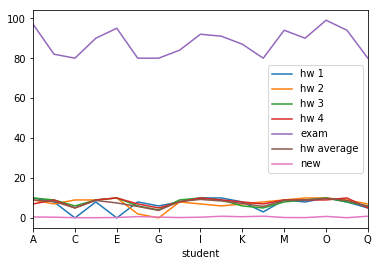

In [75]:
g2.plot()

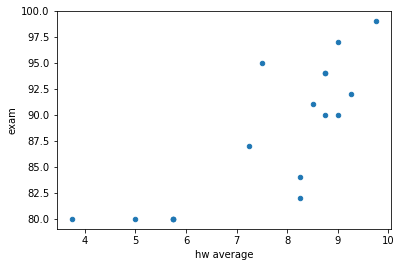

In [76]:
g2.plot.scatter(x="hw average", y="exam", marker="o")

A lot more examples at: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [77]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10.0,9.0,10,7,97,9.00,0.483109
B,8.0,7.0,9,9,82,8.25,0.356379
C,0.0,9.0,6,5,80,5.00,0.121752
D,8.0,9.0,9,9,90,8.75,0.102883
E,0.0,10.0,10,10,95,7.50,0.208124
F,8.0,2.0,6,7,80,5.75,0.651764
G,6.0,0.0,4,5,80,3.75,0.419347
H,8.0,8.0,9,8,84,8.25,0.189598
I,10.0,7.0,10,10,92,9.25,0.355005


In [78]:
g2.loc["R", :] = 1

In [79]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10.0,9.0,10.0,7.0,97.0,9.00,0.483109
B,8.0,7.0,9.0,9.0,82.0,8.25,0.356379
C,0.0,9.0,6.0,5.0,80.0,5.00,0.121752
D,8.0,9.0,9.0,9.0,90.0,8.75,0.102883
E,0.0,10.0,10.0,10.0,95.0,7.50,0.208124
F,8.0,2.0,6.0,7.0,80.0,5.75,0.651764
G,6.0,0.0,4.0,5.0,80.0,3.75,0.419347
H,8.0,8.0,9.0,8.0,84.0,8.25,0.189598
I,10.0,7.0,10.0,10.0,92.0,9.25,0.355005


In [80]:
g2.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  hw 1 &  hw 2 &  hw 3 &  hw 4 &  exam &  hw average &       new \\\\\nstudent &       &       &       &       &       &             &           \\\\\n\\midrule\nA       &  10.0 &   9.0 &  10.0 &   7.0 &  97.0 &        9.00 &  0.483109 \\\\\nB       &   8.0 &   7.0 &   9.0 &   9.0 &  82.0 &        8.25 &  0.356379 \\\\\nC       &   0.0 &   9.0 &   6.0 &   5.0 &  80.0 &        5.00 &  0.121752 \\\\\nD       &   8.0 &   9.0 &   9.0 &   9.0 &  90.0 &        8.75 &  0.102883 \\\\\nE       &   0.0 &  10.0 &  10.0 &  10.0 &  95.0 &        7.50 &  0.208124 \\\\\nF       &   8.0 &   2.0 &   6.0 &   7.0 &  80.0 &        5.75 &  0.651764 \\\\\nG       &   6.0 &   0.0 &   4.0 &   5.0 &  80.0 &        3.75 &  0.419347 \\\\\nH       &   8.0 &   8.0 &   9.0 &   8.0 &  84.0 &        8.25 &  0.189598 \\\\\nI       &  10.0 &   7.0 &  10.0 &  10.0 &  92.0 &        9.25 &  0.355005 \\\\\nJ       &  10.0 &   6.0 &   9.0 &   9.0 &  91.0 &        8.50 &  0.838008 